In [48]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = r"D:/Download/data/"
# datasetName = "lastfm_sample_190617/"
datasetName = r"\lastfm"
trainFile = path + datasetName + r"\train.csv"
validationFile = path + datasetName + r"\validation.csv"
testFile = path + datasetName + r"\test.csv"
train = pd.read_csv(trainFile, header=None)
validation = pd.read_csv(validationFile, header=None)
test = pd.read_csv(testFile, header=None)

train.columns = ["user_id", "loc_id", "count"]
validation.columns = ["user_id", "loc_id", "count"]
test.columns = ["user_id", "loc_id", "count"]

train_valid = pd.concat([train, validation])
len(train_valid)

653690

In [54]:
d = train_valid.groupby(['loc_id'])['user_id'].apply(np.unique).apply(lambda x: len(x)).reset_index()
loc_id_list = d[d['user_id'] >= 10]['loc_id'].to_list()
# train_valid = train_valid[train_valid['loc_id'].isin(loc_id_list)]
# len(train_valid)

10

(array([3.41121016e-02, 1.95921713e-02, 1.11794241e-02, 7.36755815e-03,
        5.78952762e-03, 3.87334768e-03, 2.80766472e-03, 2.20309458e-03,
        1.66000615e-03, 1.36284455e-03, 1.23988114e-03, 1.03494210e-03,
        9.32472589e-04, 8.91484783e-04, 5.94323189e-04, 6.25064043e-04,
        4.09878061e-04, 3.89384158e-04, 3.79137207e-04, 2.86914643e-04,
        2.97161594e-04, 2.97161594e-04, 2.45926837e-04, 3.38149401e-04,
        2.45926837e-04, 2.04939031e-04, 1.53704273e-04, 1.74198176e-04,
        1.12716467e-04, 1.02469515e-04, 1.43457321e-04, 1.53704273e-04,
        7.17286607e-05, 7.17286607e-05, 4.09878061e-05, 3.07408546e-05,
        5.12347577e-05, 5.12347577e-05, 5.12347577e-05, 6.14817092e-05,
        4.09878061e-05, 6.14817092e-05, 3.07408546e-05, 4.09878061e-05,
        3.07408546e-05, 3.07408546e-05, 2.04939031e-05, 6.14817092e-05,
        1.02469515e-05, 1.02469515e-05, 0.00000000e+00, 1.02469515e-05,
        0.00000000e+00, 1.02469515e-05, 0.00000000e+00, 0.000000

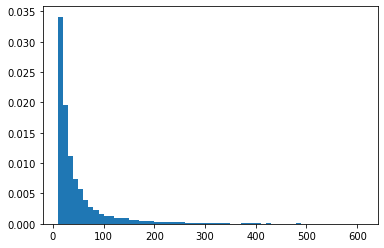

In [78]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


binwidth = 10
count_list = d['user_id'].to_list()
plt.hist(count_list, density=True, bins=range(min(count_list), max(count_list) + binwidth, binwidth))

In [55]:
train_user_set = set(train_valid['user_id'].tolist())
test_user_set = set(test['user_id'].tolist())
user_of_interest = train_user_set.intersection(test_user_set)
train_valid = train_valid[train_valid['user_id'].isin(user_of_interest) & train_valid['loc_id'].isin(loc_id_list)]
test = test[test['user_id'].isin(train_valid['user_id'].to_list())]
print(len(train_valid))

574185


In [56]:
test = test[test['loc_id'].isin(train_valid['loc_id'].to_list())]
len(test)

77633

In [57]:
def function01(data, train):
	array = []
	for index, row in data.iterrows():
		temp = [[row['user_id'], row['loc_id'], train]] * row['count']
		array.extend(temp)

	df = pd.DataFrame(array)
	# df = df.sample(frac=0.4, replace=True, random_state=1)
	df.columns = ["user_id", "loc_id", "train"]
	return df

df = pd.concat([function01(train_valid, 1), function01(test, 0)])

In [64]:
loc_df = pd.DataFrame(df['loc_id'].unique())
loc_df['index1'] = loc_df.index
loc_df.columns = ['loc_id', 'index1']

user_df = pd.DataFrame(df['user_id'].unique())
user_df['index2'] = user_df.index
user_df.columns = ['user_id', 'index2']

In [65]:
new_df = pd.merge(df, loc_df, how='inner', left_on=['loc_id'], right_on=['loc_id']) \
	[['user_id', 'index1', 'train']]
new_df = pd.merge(new_df, user_df, how='inner', left_on=['user_id'], right_on=['user_id']) \
	[['index2', 'index1', 'train']]

new_df.columns = ['user_id', 'loc_id', 'train']

In [70]:
new_df = new_df.sample(frac=1, random_state=123).sort_values(by=['user_id', 'train'], ascending=[1, 0]).reset_index()
new_df

,index,user_id,loc_id,train
0,9817,0,229,1
1,782,0,22,1
2,7413,0,185,1
3,3355,0,73,1
4,3470,0,80,1
5,300,0,19,1
6,4109,0,96,1
7,4228,0,102,1
8,35,0,1,1
9,5052,0,136,1


In [69]:
len(df)


14252205